In [126]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential

In [19]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [198]:
df = pd.read_csv(csv_path)


In [199]:
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [200]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


In [201]:
temp=df['Tdew (degC)']
temp_df = pd.DataFrame({'Temperature':temp})


In [202]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.78,1.230772e+09
2009-01-01 02:00:00,-9.77,1.230775e+09
2009-01-01 03:00:00,-9.66,1.230779e+09
2009-01-01 04:00:00,-10.02,1.230782e+09
2009-01-01 05:00:00,-10.65,1.230786e+09
...,...,...
2016-12-31 19:10:00,-5.36,1.483211e+09
2016-12-31 20:10:00,-6.84,1.483215e+09
2016-12-31 21:10:00,-6.90,1.483219e+09


# Predicting the Temperature using data extracted from the Date Time column (the cosine and sine of the day and year columns) 

In [203]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.78,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-9.77,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-9.66,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-10.02,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-10.65,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [204]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.78,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-9.77,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-9.66,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-10.02,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-10.65,0.965926,0.258819,0.012916,0.999917


In [205]:
def df_to_X_y2(df, window_size=6, forecast_size=3):
    df_as_np = df.to_numpy()
    X = []
    y = []
    row=[]
    label=[]
    for i in range(len(df_as_np)-window_size-forecast_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [o for o in df_as_np[i+window_size:i+window_size+forecast_size,0]]
        y.append(label)
    return np.array(X), np.array(y)

In [206]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70082, 6, 5), (70082, 3))

In [207]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000, 3), (5000, 6, 5), (5000, 3), (5082, 6, 5), (5082, 3))

In [208]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [209]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.21876174e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 1.20559047e+00, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 1.18510184e+00, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 1.17339406e+00, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 1.16461321e+00, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 1.14558806e+00, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 1.20559047e+00, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 1.18510184e+00, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 1.17339406e+00, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 1.16461321e+00, -2.58819045e-01,  9.65925826e-01,
  

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(3, 'linear'))

model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 18,467
Trainable params: 18,467
Non-trainable params: 0
_________________________________________________________________


In [138]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [139]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 [==============================] - 10s 6ms/step - loss: 21.9273 - root_mean_squared_error: 4.6827 - val_loss: 3.1226 - val_root_mean_squared_error: 1.7671
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 3.2778 - root_mean_squared_error: 1.8105 - val_loss: 1.8954 - val_root_mean_squared_error: 1.3767
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.8143 - root_mean_squared_error: 1.3470 - val_loss: 1.4671 - val_root_mean_squared_error: 1.2112
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4229 - root_mean_squared_error: 1.1928 - val_loss: 1.1257 - val_root_mean_squared_error: 1.0610
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2068 - root_mean_squared_error: 1.0986 - val_loss: 0.9859 - val_root_mean_squared_error: 0.9929
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0906 - root_mean_squared_error: 1.0443 - val_

In [185]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
def plot_predictions1(model, X, y, start=0, end=100,forecast=0):
    predictions = model.predict(X).flatten()
    actuals = y.flatten()
    df = pd.DataFrame(data={'Predictions':predictions[forecast::3], 'Actuals':actuals[forecast::3]})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df, mse(actuals[forecast::3], predictions[forecast::3])


(      Predictions  Actuals
 0       12.140248    12.15
 1       11.982505    11.59
 2       11.678709    11.65
 3       11.301026    10.98
 4       11.577970    10.91
 ...           ...      ...
 5077    -2.788056    -4.63
 5078    -4.369848    -4.92
 5079    -4.902806    -5.36
 5080    -5.102397    -6.84
 5081    -5.410970    -6.90
 
 [5082 rows x 2 columns],
 0.6335894055196466)

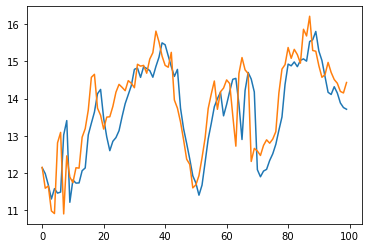

In [188]:
plot_predictions1(model4, X2_test, y2_test,forecast=0)

(      Predictions  Actuals
 0       12.140248    12.15
 1       11.982505    11.59
 2       11.678709    11.65
 3       11.301026    10.98
 4       11.577970    10.91
 ...           ...      ...
 5077    -2.788056    -4.63
 5078    -4.369848    -4.92
 5079    -4.902806    -5.36
 5080    -5.102397    -6.84
 5081    -5.410970    -6.90
 
 [5082 rows x 2 columns],
 0.6335894055196466)

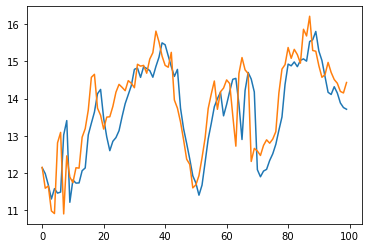

In [189]:
plot_predictions1(model4, X2_test, y2_test,forecast=1)

(      Predictions  Actuals
 0       12.021192    11.59
 1       11.891002    11.65
 2       11.632209    10.98
 3       11.313681    10.91
 4       11.620075    12.81
 ...           ...      ...
 5077    -2.930355    -4.92
 5078    -4.453113    -5.36
 5079    -4.961200    -6.84
 5080    -5.180949    -6.90
 5081    -5.506729    -7.15
 
 [5082 rows x 2 columns],
 1.0341712327508632)

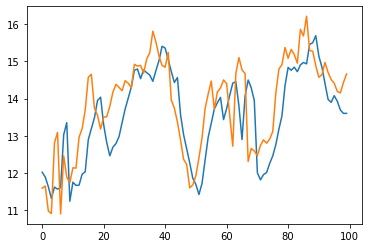

In [190]:
plot_predictions1(model4, X2_test, y2_test,forecast=2)

In [210]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.78,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-9.77,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-9.66,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-10.02,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-10.65,0.965926,0.258819,0.012916,0.999917


In [212]:
def df_to_X_y3(df, window_size=7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
        y.append(label)
    return np.array(X), np.array(y)

In [213]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [214]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [215]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
    X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
    X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
    y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
    y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
    return y

In [217]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [218]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  1.06070744],
       [-0.76312281,  0.97875128],
       [-0.72189335,  0.9875323 ],
       ...,
       [ 1.48145784, -1.7272656 ],
       [ 1.41597574, -1.76385317],
       [ 1.35049365, -1.90142245]])

In [219]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                18176     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [220]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [221]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1350 - root_mean_squared_error: 0.3674 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1664
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0207 - root_mean_squared_error: 0.1440 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1216
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0117 - root_mean_squared_error: 0.1083 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0873
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0078 - root_mean_squared_error: 0.0882 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0765
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0065 - root_mean_squared_error: 0.0808 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0706
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0059 - root_mean_squared_error: 0.0768 - val_l

In [222]:
def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
    p_actuals, temp_actuals = y[:, 0], y[:, 1]
      df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    return df[start:end]   

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,1.074381,1.060707,-0.765716,-0.793439
1,1.023919,0.978751,-0.752900,-0.763123
2,0.949944,0.987532,-0.718004,-0.721893
3,0.975648,0.889478,-0.665994,-0.652773
4,0.880240,0.879233,-0.581569,-0.652773
...,...,...,...,...
95,1.390088,1.406094,-0.399459,-0.416310
96,1.364998,1.391459,-0.399860,-0.399333
97,1.357377,1.359262,-0.379461,-0.399333
98,1.338517,1.353408,-0.367758,-0.400546


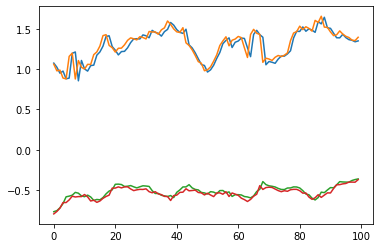

In [223]:
plot_predictions2(model5, X3_test, y3_test)

In [224]:
def postprocess_temp(arr):
    arr = (arr*temp_training_std3) + temp_training_mean3
    return arr

def postprocess_p(arr):
    arr = (arr*p_training_std3) + p_training_mean3
    return arr

In [226]:
def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
    p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
    return df

In [227]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.243429,12.15,982.658630,982.43
1,11.898626,11.59,982.764343,982.68
2,11.393161,11.65,983.052124,983.02
3,11.568794,10.98,983.481018,983.59
4,10.916880,10.91,984.177246,983.59
...,...,...,...,...
5079,-5.163538,-5.36,1001.977112,1002.18
5080,-5.609745,-6.84,1001.858948,1001.40
5081,-7.218505,-6.90,1000.991638,1001.19
5082,-7.213945,-7.15,1000.581360,1000.65


Text(0.5, 1.0, 'Temperature')

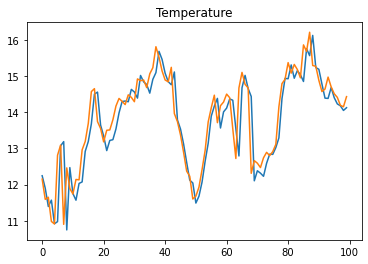

In [232]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])
plt.title('Temperature')

Text(0.5, 1.0, 'Pressure')

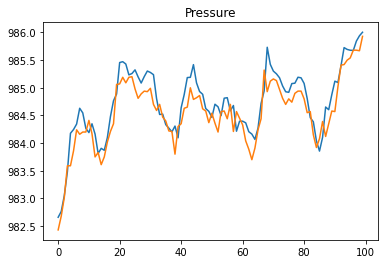

In [233]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])
plt.title('Pressure')

In [234]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 7, 32)             4992      
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 18        
Total params: 30,362
Trainable params: 30,362
Non-trainable params: 0
_________________________________________________________________


In [235]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [236]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1510 - root_mean_squared_error: 0.3885 - val_loss: 0.0431 - val_root_mean_squared_error: 0.2075
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0345 - root_mean_squared_error: 0.1858 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1731
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0206 - root_mean_squared_error: 0.1436 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1137
Epoch 4/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0112 - root_mean_squared_error: 0.1058 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0931
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0090 - root_mean_squared_error: 0.0949 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0848
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0079 - root_mean_squared_error: 0.0888 -

In [237]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 64)             832       
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 3080      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 18        
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
_________________________________________________________________


In [238]:
cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [239]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0979 - root_mean_squared_error: 0.3128 - val_loss: 0.0216 - val_root_mean_squared_error: 0.1471
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0150 - root_mean_squared_error: 0.1226 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1009
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0098 - root_mean_squared_error: 0.0989 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0863
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0082 - root_mean_squared_error: 0.0904 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0808
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0072 - root_mean_squared_error: 0.0850 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0756
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0066 - root_mean_squared_error: 0.0815 - val_loss: 0